# Realized Volatility

Import libraries and modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import Modules.Stock as Stock
import Modules.BinomialModel as BinomialModel
import Modules.BlackScholes as BlackScholes

## Convergence of Binomial Model to Black-Scholes

With increased number of time steps $n$, the price obtained in the Binomial Model will convergence to the price in Black-Scholes.

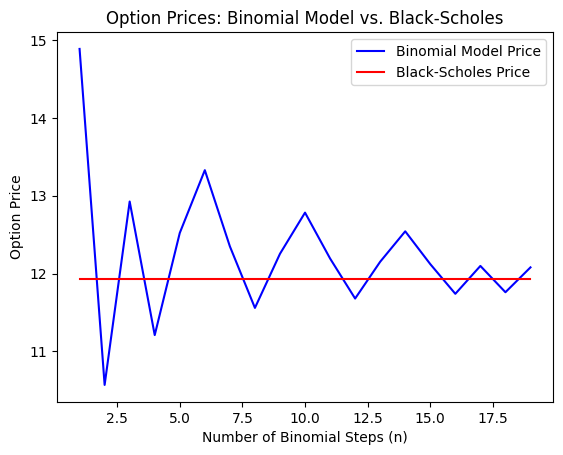

In [2]:
n_list = range(1,20)
binomial_price = []
black_scholes_price = []
    
# Add points to the plot
for n in n_list:
    binomial_price.append(BinomialModel.Option("call", 100, 100, 1, 0, 0.3, n).price)
    black_scholes_price.append(BlackScholes.Option("call", 100, 100, 1, 0, sigma=0.3).price)

# Plot the results
plt.plot(n_list, binomial_price, label='Binomial Model Price', color='blue')
plt.plot(n_list, black_scholes_price, label='Black-Scholes Price', color='red')
plt.title("Option Prices: Binomial Model vs. Black-Scholes")
plt.xlabel("Number of Binomial Steps (n)")
plt.ylabel("Option Price")
plt.legend()
plt.show()

## Call option prices

For a selected number of stocks the price of a call option with a strike price $10 higher than current market price and expiration date one year from now is calculated and plotted against historical volatility

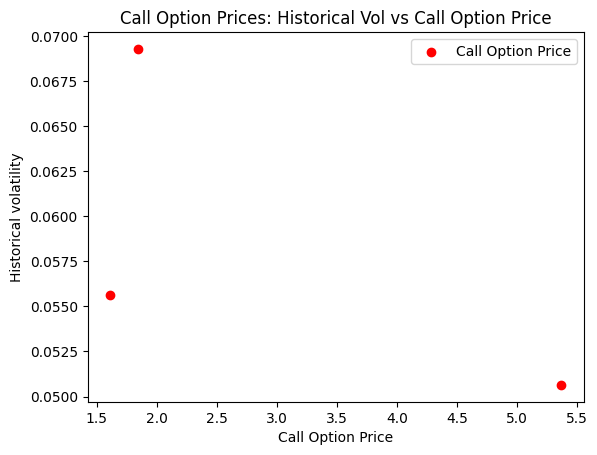

In [4]:
TICKERS = ['AAPL', 'MSFT', 'GOOG']
STRIKE_GAIN = 10

historical_std_dev = []
call_option_price = []

for ticker in TICKERS:
    stock = Stock.Stock(ticker)
    stock_std = np.sqrt(stock.get_historical_volatility(365))
    call_option = BlackScholes.Option("call", stock.current_price, stock.current_price + STRIKE_GAIN, 1, 0, sigma=stock_std)

    historical_std_dev.append(stock_std)
    call_option_price.append(call_option.price)

plt.scatter(call_option_price, historical_std_dev, label='Call Option Price', color='red')
plt.title("Call Option Prices: Historical Vol vs Call Option Price")
plt.xlabel("Call Option Price")
plt.ylabel("Historical volatility")
plt.legend()
plt.show()